In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/MLChallenge-2/Test.csv
/kaggle/input/MLChallenge-2/final.csv


In [2]:
#Importing important libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Training Data
raw_data = pd.read_csv('../input/MLChallenge-2/final.csv')
raw_data.head()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
1,57,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
2,9,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
3,147,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
4,303,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
#Shuffle the data in order to ensure that each data point creates an "independent" change on the model, without being biased by the same points before them.
from sklearn.utils import shuffle
raw_data = shuffle(raw_data)

raw_data.head()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
35,182,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0
149,13,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
56,267,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
109,209,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
203,104,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1


In [5]:
#Checking for Missing values in the data
#We also check for Caregorical Data but that isn't present so no need to label encode data
raw_data.isnull().sum(axis=0)

ID          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#Re-ensuring missing value data
raw_data.isnull().values.any()

False

In [7]:
#Understanding Dataset
raw_data.describe()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,153.339921,53.976285,0.683794,0.980237,131.822134,245.051383,0.138340,0.509881,150.260870,0.332016,1.037945,1.399209,0.691700,2.312253,0.541502
std,88.442134,9.156890,0.465916,1.032990,17.288518,52.583053,0.345941,0.524122,22.538924,0.471870,1.163799,0.612955,1.011742,0.618280,0.499262
min,1.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.000000,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,152.000000,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,0.000000,154.000000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,230.000000,60.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,303.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#Comparing the two classes if outputs in order to ensure the training is done on both equally
raw_data['target'].value_counts()

1    137
0    116
Name: target, dtype: int64

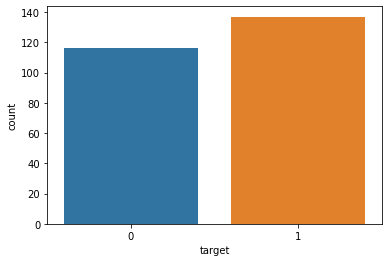

In [9]:
#Visualizing the above
sns.countplot(raw_data['target'])

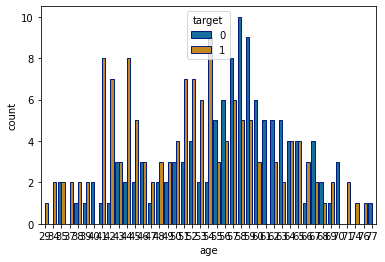

In [10]:
#Examining age and target relationship as age is trivially the most important factor
sns.countplot(x='age', hue='target', data=raw_data, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

In [11]:
#Defining the correlation between all parameters
raw_data.corr()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
ID,1.000000,0.172234,0.198785,-0.348018,0.121732,-0.012450,0.010519,0.008488,-0.412642,0.397218,0.290046,-0.257103,0.375470,0.269244,-0.866391
age,0.172234,1.000000,-0.097568,-0.047036,0.269714,0.193554,0.100004,-0.114881,-0.416952,0.123058,0.221756,-0.166574,0.262633,0.060891,-0.234145
sex,0.198785,-0.097568,1.000000,-0.013036,-0.026716,-0.181231,0.100135,-0.084655,0.015444,0.136478,0.096863,-0.028669,0.137520,0.220136,-0.318666
cp,-0.348018,-0.047036,-0.013036,1.000000,0.064463,-0.049294,0.118727,0.033345,0.272585,-0.434243,-0.120185,0.093984,-0.123558,-0.176697,0.397858
trestbps,0.121732,0.269714,-0.026716,0.064463,1.000000,0.107065,0.169342,-0.072283,-0.079355,0.067098,0.206615,-0.122464,0.097582,0.031946,-0.167177
chol,-0.012450,0.193554,-0.181231,-0.049294,0.107065,1.000000,-0.015226,-0.135582,-0.003785,0.101345,0.015427,0.008472,0.018424,0.096053,-0.035225
fbs,0.010519,0.100004,0.100135,0.118727,0.169342,-0.015226,1.000000,-0.106056,-0.000066,0.033534,0.049006,-0.093053,0.088327,-0.072892,-0.021886
restecg,0.008488,-0.114881,-0.084655,0.033345,-0.072283,-0.135582,-0.106056,1.000000,0.067636,-0.061454,-0.053963,0.117369,-0.091516,0.021055,0.108372
thalach,-0.412642,-0.416952,0.015444,0.272585,-0.079355,-0.003785,-0.000066,0.067636,1.000000,-0.395844,-0.364818,0.415242,-0.221814,-0.101264,0.440193
exang,0.397218,0.123058,0.136478,-0.434243,0.067098,0.101345,0.033534,-0.061454,-0.395844,1.000000,0.305029,-0.254278,0.148762,0.200907,-0.479824


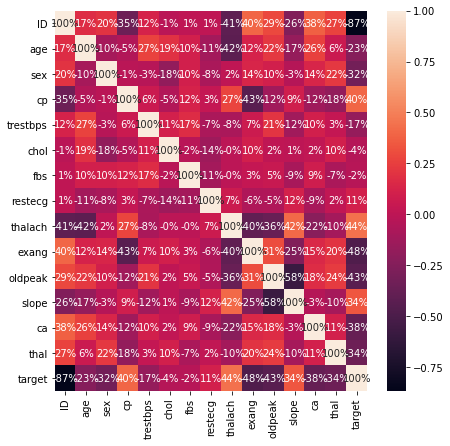

In [12]:
#Ploting the relationship of all parameters
plt.figure(figsize = (7,7))
sns.heatmap(raw_data.corr(), annot = True, fmt='.0%')

In [13]:
colms = raw_data.shape[1]
print("Number of columns = {}".format(colms))

Number of columns = 15


In [14]:
# Creating an output y and input x 
# Also dropping Id parameter as it is not relevent data
y_train = raw_data.iloc[:, colms-1:colms]
x_train = raw_data.iloc[:, 1:colms-1]

x_train = np.array(x_train)
y_train = np.array(y_train)

print(f"Shape of X is {x_train.shape} and Shape of Y is {y_train.shape}")

Shape of X is (253, 13) and Shape of Y is (253, 1)


In [15]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
x_scalar = StandardScaler()

x_train = x_scalar.fit_transform(x_train)

print(x_train.shape, y_train.shape)

(253, 13) (253, 1)


In [16]:
#Model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 2)
forest.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=2)

In [17]:
#Checking Model Score
model = forest
model.score(x_train, y_train)

1.0

In [18]:
#Test Input Data & Making Predictions
pred_data = pd.read_csv('../input/MLChallenge-2/Test.csv')
pred_data.head()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,128,67,0,2,152,277,0,1,172,0,0.0,2,1,2
1,232,57,1,0,165,289,1,0,124,0,1.0,1,3,3
2,220,48,1,0,130,256,1,0,150,1,0.0,2,2,3
3,184,58,1,2,112,230,0,0,165,0,2.5,1,1,3
4,25,40,1,3,140,199,0,1,178,1,1.4,2,0,3


In [19]:
# Dropping Id parameter as it is not relevent to data output
colms = raw_data.shape[1]
print("Number of columns = {}".format(colms))

pred_data = pred_data.iloc[:, 1:colms]

Number of columns = 15


In [20]:
pred_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67,0,2,152,277,0,1,172,0,0.0,2,1,2
1,57,1,0,165,289,1,0,124,0,1.0,1,3,3
2,48,1,0,130,256,1,0,150,1,0.0,2,2,3
3,58,1,2,112,230,0,0,165,0,2.5,1,1,3
4,40,1,3,140,199,0,1,178,1,1.4,2,0,3


In [21]:
#Checking for Missing values in Test Input Data
#We also check for Caregorical Data but that isn't present so no need to label encode any part of data
pred_data.isnull().sum(axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [22]:
#Re-ensuring missing value in Test Input Data
pred_data.isnull().values.any()

False

In [23]:
#Converting pred_data into a numpy array
pred_data = np.array(pred_data)

#Scaling the Test Input Data
from sklearn.preprocessing import StandardScaler
x_scalar = StandardScaler()

pred_data = x_scalar.fit_transform(pred_data)

print(pred_data.shape)

(50, 13)


In [24]:
#Making Predictions
y_pred = model.predict(pred_data)
print(y_pred.shape)

(50,)


In [25]:
#The Predictions
print(y_pred)

[1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0
 0 0 1 0 0 1 1 0 1 1 0 0 1]
